In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [28]:
df = pd.read_csv("drive/MyDrive/Source/insurance.csv")

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


First of all let's take a look at the correlation matrix

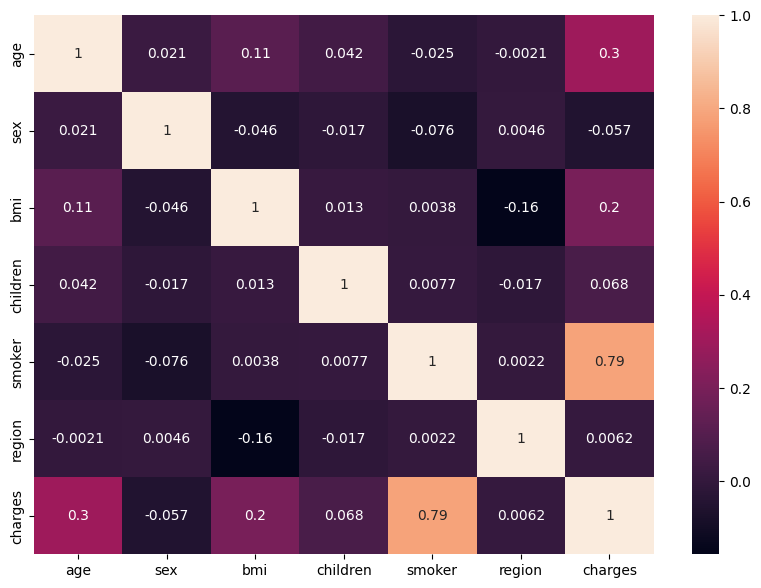

In [32]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

We can see a strong dependence between following parameters: "charges" & "smoker", "charges" & "bmi", "charges" & "age". So let's investigate further.

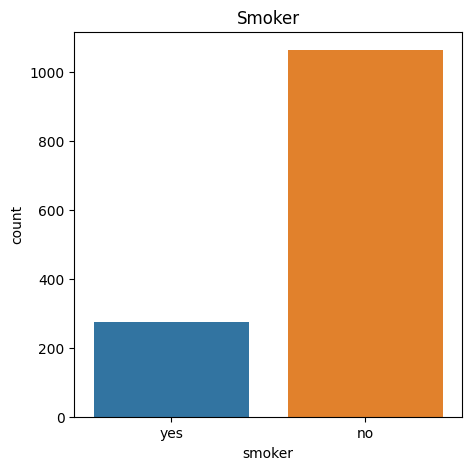

In [34]:
df = pd.read_csv("drive/MyDrive/Source/insurance.csv")

plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

Text(0.5, 1.0, 'Charges for smokers by gender')

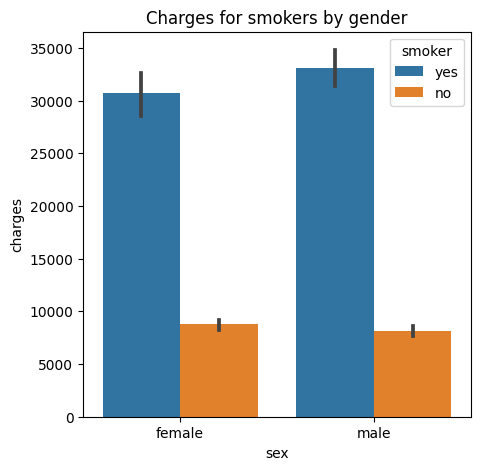

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers by gender')

Text(0.5, 1.0, 'Charges for non-smokers')

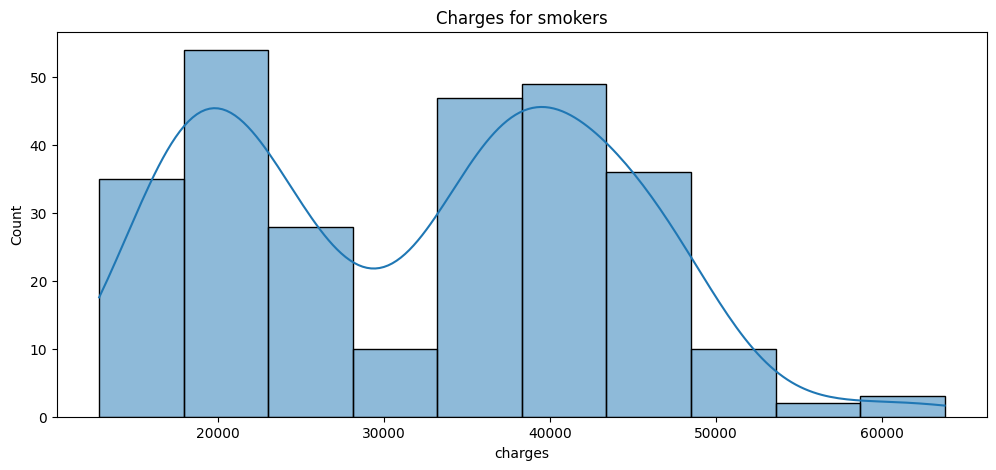

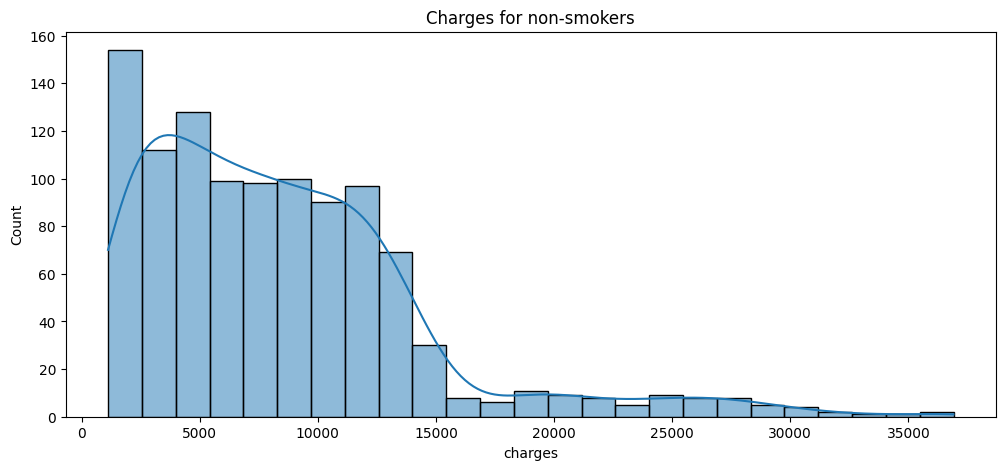

In [36]:
s_df = df.loc[df['smoker'] == "yes"]

f= plt.figure(figsize=(12,5))
sns.histplot(data=s_df, x="charges", kde=True)
plt.title('Charges for smokers')

ns_df = df.loc[df['smoker'] == "no"]

f= plt.figure(figsize=(12,5))
sns.histplot(data=ns_df, x="charges", kde=True)
plt.title('Charges for non-smokers')

Seems like smoking patients spend considerably more on treatment

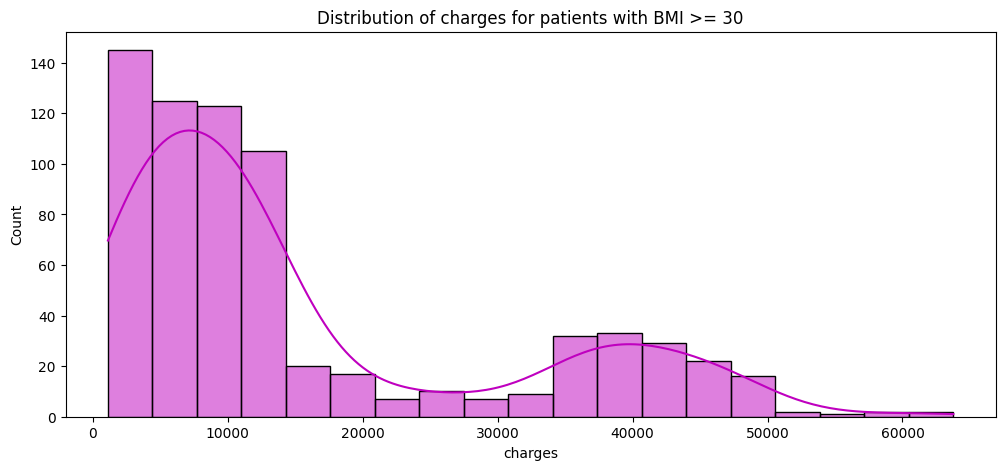

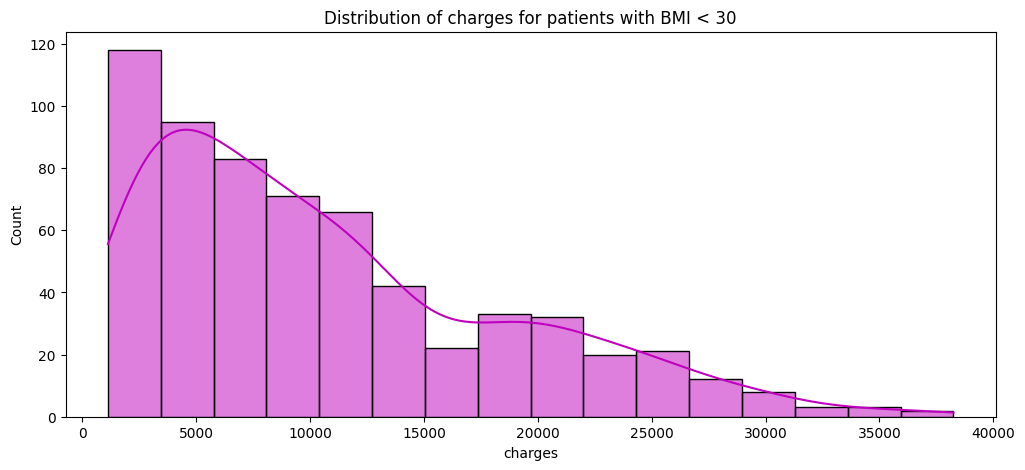

In [37]:
data = df.loc[df['bmi'] >= 30]

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI >= 30")
ax = sns.histplot(data[(data.bmi >= 30)]['charges'], color = 'm', kde=True)

data = df.loc[df['bmi'] < 30]

plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI < 30")
ax = sns.histplot(data[(data.bmi < 30)]['charges'], color = 'm', kde=True)

Data confirms that patients with BMI above 30 tend to have more medical charges (particularly with values higher than 40,000)

Text(0.5, 1.0, 'Scatter plot of charges and BMI with trend lines')

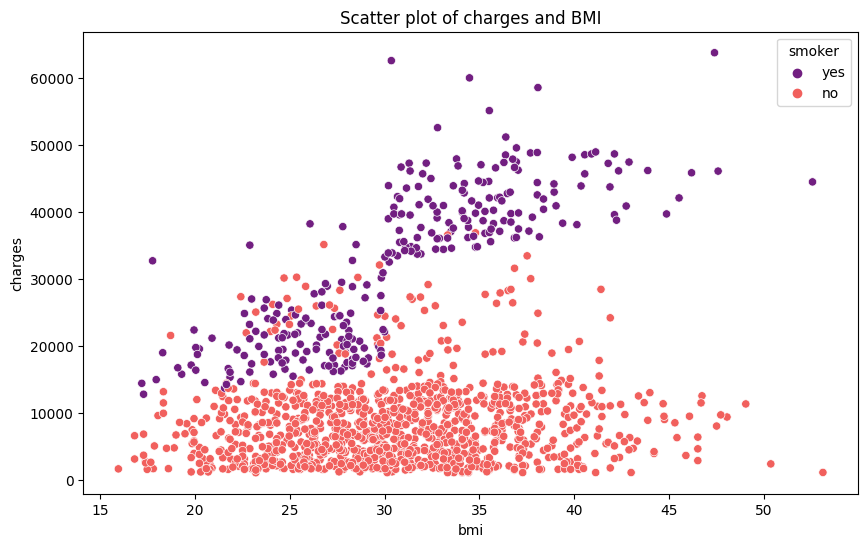

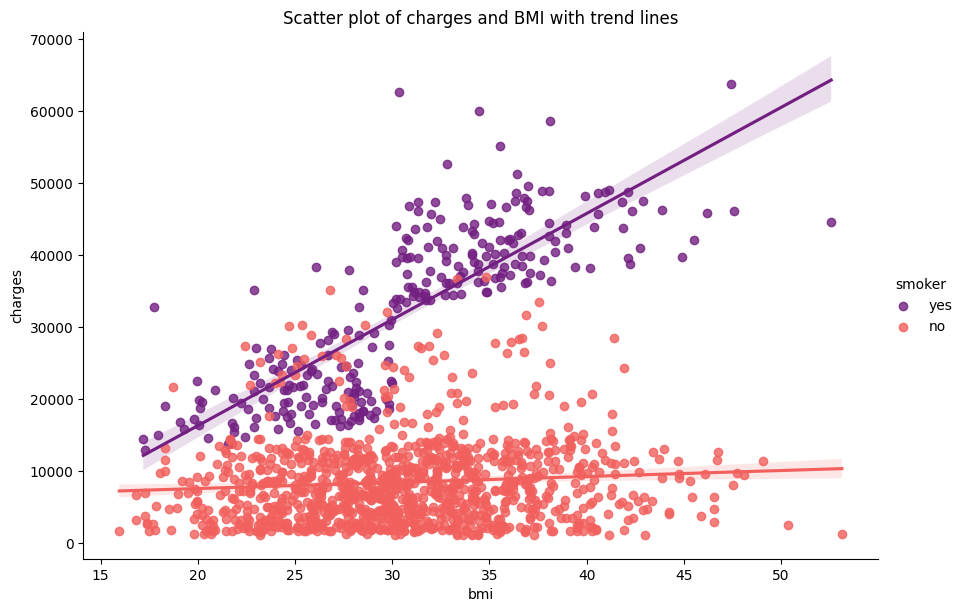

In [38]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and BMI')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', height=6, aspect=1.5)
plt.title("Scatter plot of charges and BMI with trend lines")

This further illustrates that higher BMI means higher charges, especially for smokers. Time to build the regression model.

In [39]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [111]:
x = df.drop(['charges', 'sex'], axis = 1)
y = df.charges

x_train,x_test, y_train,y_test = train_test_split(x,y, random_state = 0)
linreg = LinearRegression()
lr = linreg.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("R2 score: ", lr.score(x_test,y_test))

R2 score:  0.7962793642414526


Pretty good R2, but let's see if we can do better with polynomial signs

In [114]:
X = df.drop(['charges','sex'], axis = 1)
Y = df.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("R2 score: ", plr.score(X_test,Y_test))

R2 score:  0.8853481465591346


R2 score has certainly improved

In [115]:
data = {'age':65, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,65,25,2,1,2


In [116]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [36917.73631672]
